In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib

In [2]:
# mutation color library
COLORS = {'T1764.0-': '#F50202',
             'A1664.0G': '#fca003',
             'A535.0G': '#5EC0D2',
             'T1440.0C': '#F1F87A',
             'T1440.0G': '#bfbb71',
             'A1443.0G': '#731f1f',
             'A1611.0G': '#6988b8',
             'C1724.0T': '#8FD95A',
             'A1744.0G': '#FBB3DD',
             'G1906.0A': '#A3A3A3',
             'C3358.0T': '#26451C',
             'G3114.0A': '#B37A42',
             'A1770.0G': '#b3b2ad',
             'G2310.0A': '#033E86',
             'A2626.0G': '#8FD95A',
             'C3299.0T': '#211785',
             'C1718.0T': '#4e0d8c',
             'T862.0C': '#880E05',
             'A2790.0T': '#DF36C6',
             'G1736.0A': '#CFFD2F',
             'C1549.0T': '#cd99f2',
             'G531.0A': '#DFC236',
             'C1050.0T': '#0D2291',
             'G1688.0T': '#13B908',
             'A2356.0G': '#2d16f7',
             'T170.0A': '#C60DC3',
             'A1673.0G': '#E2D492',
             'C2859.0T': '#972FFE',
             'T21.0C': 'grey',
             'T323.0A': 'black',
             'G2317.0A': '#E4CEFD',
             'C3378.0T': '#828282',
             'C1735.0T': '#AFF31E',
             'G1560.0A': '#646669',
             'T1829.0C': '#147040',
             'A2731.0G': '#B0F7FF',
             'G710.0A': "#ad8f61", 
             'C1056.0T': "#bd099f", 
             'A784.0G': "#875408", 
             'A1520.0G': "#92bf91",
             'A1829.0G': "#6e465a"}

In [3]:
# generate colors for mutations that are not in the COLOR lib
def generate_colors(i):
    cmap_a = matplotlib.colormaps['Pastel1']
    cmap_b = matplotlib.colormaps['Dark2']  
    cmap_c = matplotlib.colormaps['tab20b'] 
    cmap_d = matplotlib.colormaps['Set3'] 
    
    if i < cmap_a.N:
        color = cmap_a(i % cmap_a.N)
    elif i < (cmap_a.N + cmap_b.N):
        color = cmap_b((i - cmap_a.N) % cmap_b.N)
    elif i < (cmap_a.N + cmap_b.N + cmap_c.N):
        color = cmap_c((i - cmap_a.N - cmap_b.N) % cmap_c.N)
    else:
        color = cmap_d((i - cmap_a.N - cmap_b.N - cmap_c.N) % cmap_d.N)    
    
    
    return color

In [4]:
def create_mutations_graph(df, mutations_list, output_path, title=None):
    """
    This function gets a df of freq files, a list of mutations and a path to save graph to.
    """
    # all experiments
    plot_order = [('Carmel', 'A', "A"), ('Carmel', 'B', "B"), ('Shir', 'A', "C"), ('Shir', 'B', "D"),
                  ('Shir', 'C', "E"), ('Maria', 'A', "F"), ('Maria', 'B', "G"), ('Maria', 'C', "H")]
    ### set order of legend for paper
    legend_order = ["A1744.0G", "T1829.0C", "G1688.0T", "C1735.0T", "A1664.0G", "C1718.0T", "C2859.0T", "C1549.0T" "A535.0G"]
    plt.style.use('default')
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6), facecolor="white")
    axes[0, 2].set_facecolor("white")
    axes[0, 2].grid(color="#e1e4e8")
    axes = axes.flatten()
    for line, a in zip(plot_order, axes):
        df_line = df[(df.Replicate == line[1]) & (df.experiment == line[0])].copy()
        df_line = df_line.sort_values('Passage')
        color_legend = {}
        i = 0
        for m in mutations_list:
            df_line_mutation = df_line[df_line.Full_mutation == m].copy().sort_values('Passage')
            if m in COLORS:
                a.plot('Passage', 'frequency', data = df_line_mutation, linestyle='-', marker='.', label = m, color=COLORS[m])
                color_legend[m] = COLORS[m]
            else:
                new_color = generate_colors(i)
                a.plot('Passage', 'frequency', data = df_line_mutation, linestyle='-', marker='.', label = m, color=new_color)
                color_legend[m] = new_color
                i = i + 1
        a.set_title('Line {}'.format(line[2]), fontsize=16)
        a.set_ylim(0,1)
        a.set_xlim(-0.5,10.5)
        a.set_xticks([0,2,4,6,8,10])
        a.set_facecolor('white')
        a.grid(color='#e1e4e8')
    axes[0].set_ylabel('Mutation Frequency\n', fontsize=16, color='black')
    axes[0].yaxis.set_label_coords(-0.1, -0.3)
    axes[6].set_xlabel('\nTime (passage)', fontsize=16, color='black')
    axes[6].xaxis.set_label_coords(-0.3, -0.1)
    if title:
        fig.set_title(title)
    plt.subplots_adjust(wspace=0.3, hspace=0.4)
    ordered_colors = {}
    for key in legend_order:
        if key in color_legend:
            new_key = key.replace(".0", "").replace("T", "U")
            ordered_colors[new_key] = color_legend[key]
    for key in color_legend:
        if key not in legend_order:
            new_key = key.replace(".0", "").replace("T", "U")
            ordered_colors[new_key] = color_legend[key]
    color_legend = ordered_colors
    legend_patches = [mpatches.Patch(color=col, label=lab) for lab, col in color_legend.items()]
    plt.legend(handles=legend_patches, fontsize=14, bbox_to_anchor=(1.04,1.5), loc="center left")
    plt.savefig(output_path, bbox_inches='tight', dpi=800)
    plt.show()
    return

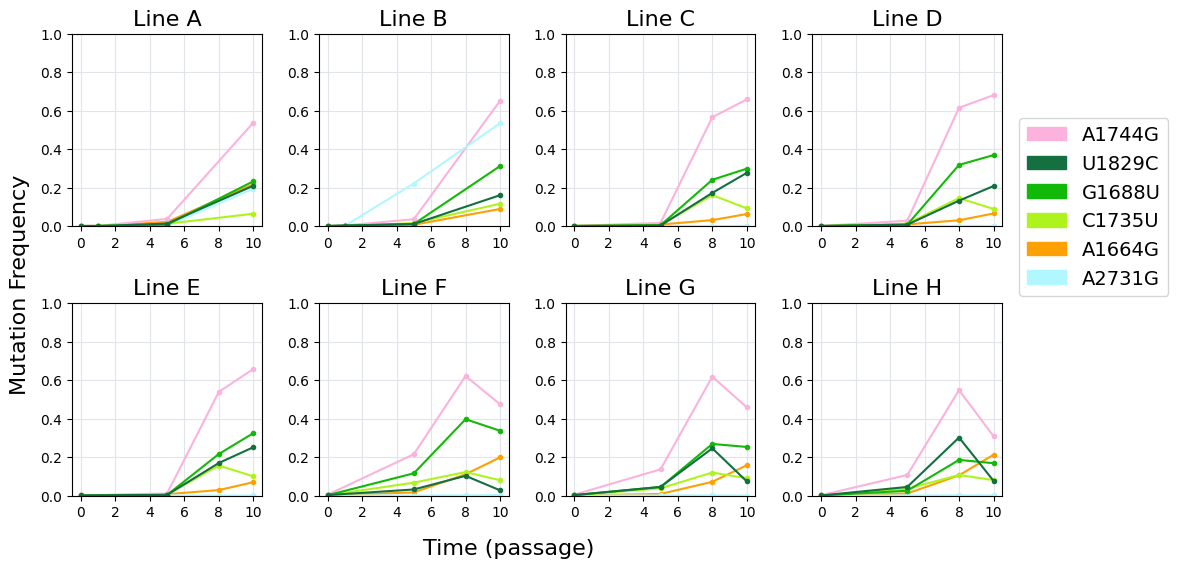

In [5]:
input_path = "/sternadi/nobackup/volume1/arielle/moi_10/merged_freq_files/all_freqs.csv"
df = pd.read_csv(input_path)

cutoff = 0.1   # mutation frequency cutoff
coverage = 100   # position coverage cutoff
n = list(range(30)) + list(range(3539, 3570))

# create a list of mutations that appear in more than one line
mutations_appearing_more_than_once = df[(df.read_base != df.ref_base) & (df.frequency > cutoff) & (df.coverage > coverage) & ~(df.ref_pos.isin(n))].sort_values('frequency', ascending=False)
mutations_appearing_more_than_once = mutations_appearing_more_than_once[['Full_mutation', 'experiment', 'Replicate']].drop_duplicates()
mutations_appearing_more_than_once = mutations_appearing_more_than_once.groupby('Full_mutation').Replicate.count().reset_index()
mutations_appearing_more_than_once = mutations_appearing_more_than_once[mutations_appearing_more_than_once.Replicate > 1].Full_mutation.tolist()
# generate line plot
create_mutations_graph(df, mutations_appearing_more_than_once, "/sternadi/home/volume3/arielle_k/for_adi/paper_2024/moi_10_line_plots_fil_{}cut.png".format(cutoff))